In [ ]:
# It is important to compare the performance for multiple different machine learning algorithm consistently.
'''When we work on a machine learning project, we often end up with multiple good models to choose from.
   Each model will have different performace characteristics.
   
   Using resampling methods like cross_validation you can get an estimate for how accurate each model
   may be on unseen data.
   
   A resuable template for evaluting the performace of multiple algorithm on one dataset.
   
   The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is 
   evaluated in the same way on the same data.
   '''

In [20]:
# Comparing Classification Algorithms

# Load Dataset
import pandas as pd
filename='pima-indians-diabetes.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataset=pd.read_csv(filename,names=names)
array=dataset.values
x=array[:,:-1]
y=array[:,-1]

In [21]:
# Prepare Model
models=[]
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
models.append(('Log_re_class',LogisticRegression()))
# Support Vector Classifier
from sklearn.svm import SVC
models.append(('svc',SVC()))
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
models.append(('Naive_Bayes',GaussianNB()))
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
models.append(('knn',KNeighborsClassifier()))
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
models.append(('Decision_Tree',DecisionTreeClassifier()))
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
models.append(('Random_Forest',RandomForestClassifier()))

In [22]:
# Evaluate Each Model in turn
accuracys=[]
names=[]
error='accuracy'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
for name, model in models:
    fold=KFold(n_splits=10,random_state=0)
    predict=cross_val_score(model,x,y,cv=fold,scoring=error)
    accuracys.append(predict)
    names.append(name)
    msg="%s : %f (%f) " %(name,predict.mean(),predict.std())
    print(msg)

Log_re_class : 0.769515 (0.048411) 


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svc : 0.651025 (0.072141) 
Naive_Bayes : 0.755178 (0.042766) 
knn : 0.726555 (0.061821) 
Decision_Tree : 0.693900 (0.059967) 


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random_Forest : 0.742191 (0.057425) 


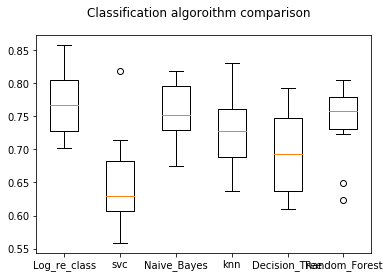

In [24]:
# Boxplot Alogorithm coparison
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle('Classification algoroithm comparison')
axis=fig.add_subplot(111)
plt.boxplot(accuracys)
axis.set_xticklabels(names)
plt.show()

In [ ]:
# These results, it would suggest that both logisitc regression, naive bayes and random forest classifier.
# Those 3 algorithms will be worthy for further study of this problem.